# Exercise 3.3 Contour plots (cartopy)
prepared by M.Hauser

Besides `pcolormesh` we can also do contour and filled contour plots in matplotlib.

Note that most of what we show here for georeferenced plots also applies for normal `contour` and `contourf`.

## Import libraries

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/tarunchadha/anaconda3/envs/pyvis/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import mplotutils as mpu

## First filled contour plot (`contourf`)

`contourf`, also takes x, y, z as input:

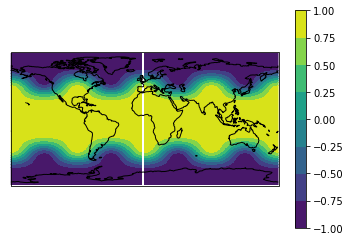

In [3]:
# create sample data
lon, lat, data = mpu.sample_data_map(90, 48)

# ====

ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

h = ax.contourf(lon, lat, data)
plt.colorbar(h)

ax.set_global()

It also has the same issue as pcolormesh - one stripe is white. The proposed solution for contour is to add a wrap-around point, i.e. repeat the first column at the end. This is done with the function `add_cyclic_point` which can be found in `cartopy.util`

In [4]:
import cartopy.util as cutil

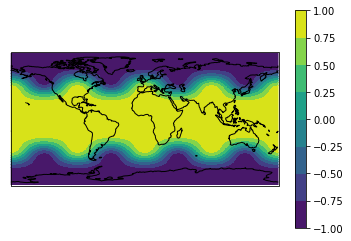

In [5]:
# create sample data
lon, lat, data = mpu.sample_data_map(90, 48)

# ====

ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

DATA, LON = cutil.add_cyclic_point(data, lon)
h = ax.contourf(LON, lat, DATA)
plt.colorbar(h)

ax.set_global()

## Load data: CMIP 5, historical precipitation climatology (1986 to 2005)

Create a netCDF with historical, and projected climatlological precipitation, as well as the relative change between them, from all CMIP5 models for RCP8.5 (Taylor et al., 2012).

The data was prepared in [another notebook](../data/prepare_CMIP5_map.ipynb).

In [6]:
fN = '../data/cmip5_delta_pr_rcp85_map.nc'

# load data, omitting some unecessary variables
pr = xr.open_dataset(fN, drop_variables=['proj', 'agree_sign', 'pval'])

pr

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144)
Coordinates:
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Data variables:
    pr_rel   (lat, lon) float64 ...
    hist     (lat, lon) float64 ...
Attributes:
    data:                CMIP5 precipitation (pr)
    time_periods:        hist: 1986-2005; proj: 2081-2100
    pr_delta:            (proj - hist) / hist * 100
    source:              https://data.iac.ethz.ch/atmos/
    reference:           Taylor et al., 2012
    scenario:            rcp8.5
    interpolation_grid:  2.5 x 2.5 degrees bilinear interpolation

### Exercise
 * plot the climatological precipitation amount
 
 > note: we need to pass numpy arrays and not xarray variables to `add_cyclic_point`, therefore I used `*.values`
 
 * add a colorbar

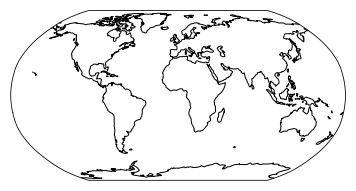

In [7]:
# get data
lon, lat, hist = pr.lon.values, pr.lat.values, pr.hist.values

# plot

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

# code here

### Solution

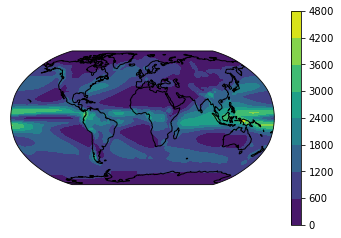

In [8]:
# get data
lon, lat, hist = pr.lon.values, pr.lat.values, pr.hist.values

# plot

f = plt.figure()

f.set_size_inches(15 / 2.54, 10 / 2.54)

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

HIST, LON = cutil.add_cyclic_point(hist, lon)

h = ax.contourf(LON, lat, HIST, transform=ccrs.PlateCarree())
plt.colorbar(h)
ax.set_global()

## `levels`

`contourf` (and `contour`) take a `levels` keyword to manually set the levels to draw, e.g.: `levels=np.arange(0, 1.1, 0.25)`. It clips values outside of levels.

Thus, this is much easier than in `pcolormesh`.

### Note on np.arange
`np.arange` follows the same logic as `range`: the upper bound needs to be larger than where we want it to stop, because it starts at 0. 

In [9]:
print(list(range(10)))
print(np.arange(10))

print()

print("Probably not what we want:")
print(np.arange(0, 1, 0.5))

print("We have to do it like so:")
print(np.arange(0, 1.1, 0.5))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0 1 2 3 4 5 6 7 8 9]

Probably not what we want:
[0.  0.5]
We have to do it like so:
[0.  0.5 1. ]


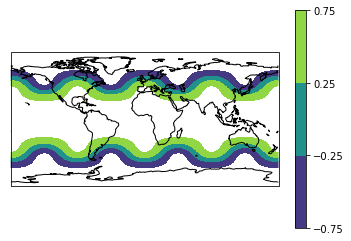

In [10]:
# create sample data
lon, lat, data = mpu.sample_data_map(90, 48)

# ====

ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

DATA, LON = cutil.add_cyclic_point(data, lon)
h = ax.contourf(LON, lat, DATA, np.arange(-0.75, 1.1, 0.5))
plt.colorbar(h)

ax.set_global()

## `extend`

This is probably not what we want - again, we can use the `extend` keyword.

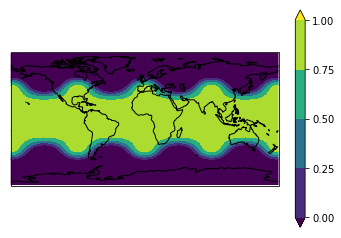

In [11]:
# create sample data
lon, lat, data = mpu.sample_data_map(90, 48)

# ====

ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

DATA, LON = cutil.add_cyclic_point(data, lon)
h = ax.contourf(LON, lat, DATA, levels=np.arange(0, 1.1, 0.25), extend='both')
plt.colorbar(h)

ax.set_global()

### Exercise

 * create the levels 0-1000, 1000-2000, 2000-3000 for the precipitation plot
 * don't forget to indicate that values > 3000 are clipped

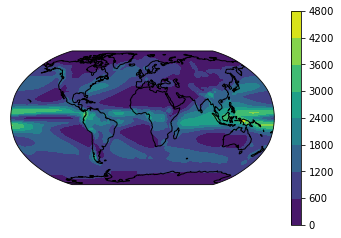

In [12]:
# get data
lon, lat, hist = pr.lon.values, pr.lat.values, pr.hist.values

# plot

f = plt.figure()

f.set_size_inches(15 / 2.54, 10 / 2.54)

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

HIST, LON = cutil.add_cyclic_point(hist, lon)

h = ax.contourf(LON, lat, HIST, transform=ccrs.PlateCarree())
plt.colorbar(h)
ax.set_global()

### Solution

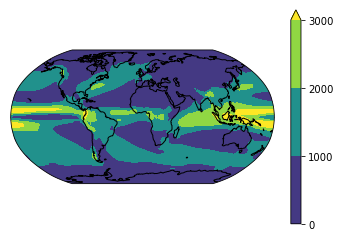

In [13]:
# get data
lon, lat, hist = pr.lon.values, pr.lat.values, pr.hist.values

# plot

f = plt.figure()

f.set_size_inches(15 / 2.54, 10 / 2.54)

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

HIST, LON = cutil.add_cyclic_point(hist, lon)

levels = np.arange(0, 3100, 1000)

h = ax.contourf(LON, lat, HIST, transform=ccrs.PlateCarree(), levels=levels, extend='max')
plt.colorbar(h)
ax.set_global()

## `contour`

`contour` plots contours that are not filled. `contour` basically takes the same arguments as `contourf`. It additionally takes a `linewidths` and a `linestyles` parameter. If the we choose a monochrome color, negative contours are dashed, unless otherwise specified.

See the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.contourf.html) for details.

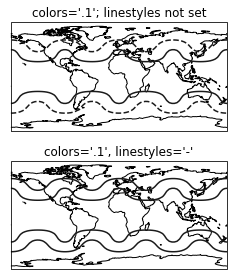

In [14]:
# create sample data
lon, lat, data = mpu.sample_data_map(90, 48)
DATA, LON = cutil.add_cyclic_point(data, lon)

# ====

f, axes = plt.subplots(2, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))

ax = axes[0]

ax.coastlines()
h = ax.contour(LON, lat, DATA, levels=[-0.5, 0.75], colors='.1', transform=ccrs.PlateCarree())
ax.set_title("colors='.1'; linestyles not set")
ax.set_global()

ax = axes[1]

ax.coastlines()
h = ax.contour(LON, lat, DATA, levels=[-0.5, 0.75], colors='.1', linestyles='-', transform=ccrs.PlateCarree())
ax.set_title("colors='.1', linestyles='-'")
ax.set_global()

f.tight_layout()

### Exercise
 * add contourlines for the relative change of precipitation in the next century
 * indicate a decrease of -25 % with brown ('#8c510a')
 * indicate an increase of 25 % with green ('#01665e')

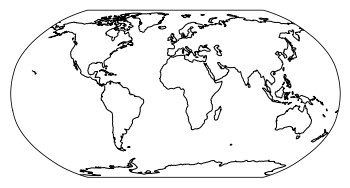

In [15]:
# get data
lon, lat, pr_rel = pr.lon.values, pr.lat.values, pr.pr_rel.values
PR_REL, LON = cutil.add_cyclic_point(pr_rel, lon)

# ====

# plot

f = plt.figure()

f.set_size_inches(15 / 2.54, 10 / 2.54)

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

# levels =
colors = ['#8c510a', '#7fbc41']

# h = ax.contour(...)


ax.set_global()

### Solution

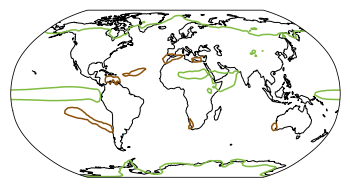

In [16]:
# get data
lon, lat, pr_rel = pr.lon.values, pr.lat.values, pr.pr_rel.values
PR_REL, LON = cutil.add_cyclic_point(pr_rel, lon)

# plot

f = plt.figure()

f.set_size_inches(15 / 2.54, 10 / 2.54)

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

levels = [-25, 25]
colors = ['#8c510a', '#7fbc41']

h = ax.contour(LON, lat, PR_REL, transform=ccrs.PlateCarree(), levels=levels, colors=colors)

ax.set_global()

## contour label

The contour lines can be labeled by passing `h` to `ax.clabel`:

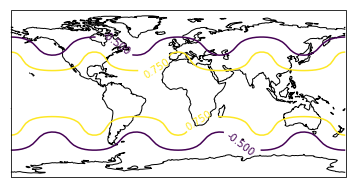

In [17]:
# create sample data
lon, lat, data = mpu.sample_data_map(90, 48)
DATA, LON = cutil.add_cyclic_point(data, lon)

# ====

f, axes = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))
ax = axes

ax.coastlines()
h = ax.contour(LON, lat, DATA, levels=[-0.5, 0.75], transform=ccrs.PlateCarree())

cl = ax.clabel(h)

ax.set_global()

## fixing the strange lines

This causes 'wrong' lines. This can be fixed in three ways, all are not entirely satifiying:
 * setting `inline=False`, however, the contour lines are not broken at the position of the text
 * not adding the cyclic point (at the cost of adding a hole)
 * changing 360 to 359.99999 in LON
 
Note
> You don't always get these lines, that depends on the data you are plotting

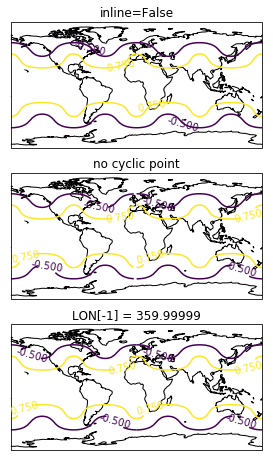

In [18]:
# create sample data
lon, lat, data = mpu.sample_data_map(90, 48)
DATA, LON = cutil.add_cyclic_point(data, lon)

# ====

f, axes = plt.subplots(3, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))
f.set_size_inches(30 / 2.54, 20 / 2.54)
axes = axes.flatten()

# ====

ax = axes[0]
ax.coastlines()

h = ax.contour(LON, lat, DATA, levels=[-0.5, 0.75], transform=ccrs.PlateCarree())
cl = ax.clabel(h, inline=False)

ax.set_global()
ax.set_title('inline=False')

# ====

ax = axes[1]
ax.coastlines()

h = ax.contour(lon, lat, data, levels=[-0.5, 0.75], transform=ccrs.PlateCarree())
cl = ax.clabel(h)

ax.set_global()
ax.set_title('no cyclic point')

# ====

ax = axes[2]
ax.coastlines()

LON[-1] = 359.99999

h = ax.contour(LON, lat, DATA, levels=[-0.5, 0.75], transform=ccrs.PlateCarree())
cl = ax.clabel(h)

ax.set_global()
ax.set_title('LON[-1] = 359.99999');


### Exercise
 * add labels to the contourlines for the relative change of precipitation
 * Specify the number format as `fmt='%1.0f %%'` to get '25 %'

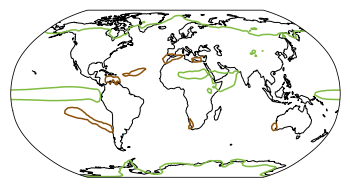

In [19]:
# get data
lon, lat, pr_rel = pr.lon.values, pr.lat.values, pr.pr_rel.values
PR_REL, LON = cutil.add_cyclic_point(pr_rel, lon)

# plot

f = plt.figure()

f.set_size_inches(15 / 2.54, 10 / 2.54)

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

levels = [-25, 25]
colors = ['#8c510a', '#7fbc41']

h = ax.contour(LON, lat, PR_REL, transform=ccrs.PlateCarree(), levels=levels, colors=colors)

#code here


ax.set_global()

### Solution

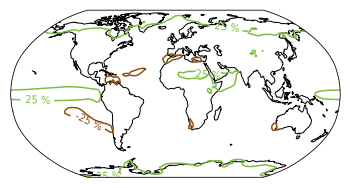

In [20]:
# get data
lon, lat, pr_rel = pr.lon.values, pr.lat.values, pr.pr_rel.values
PR_REL, LON = cutil.add_cyclic_point(pr_rel, lon)

# plot

f = plt.figure()

f.set_size_inches(15 / 2.54, 10 / 2.54)

ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

levels = [-25, 25]
colors = ['#8c510a', '#7fbc41']

h = ax.contour(LON, lat, PR_REL, transform=ccrs.PlateCarree(), levels=levels, colors=colors)
cl = ax.clabel(h, fmt='%1.0f %%')

ax.set_global()

## Bonus: xarray

Again, we can use `xarray` to plot contours:
    
    ds.data.plot.contour(ax=ax, ...)

    ds.data.plot.contourf(ax=ax, ...)

### Open temperature field from CESM

In [21]:
fN = '../data/cesm_temp.nc'

cesm = xr.open_dataset(fN)

Note that xarray
 * automatically chooses a divergent colormap if the values cross 0
 * automatically set `extent` appropriately

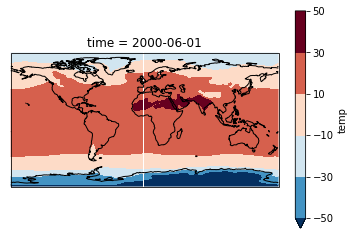

In [22]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

temp = cesm.temp - 273.15

levels = np.arange(-50, 51, 20)

temp.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels=levels)

ax.set_global()

### cyclic point

`xarray` does not add a cyclic point. This can be achieved with a function in `mpu`.

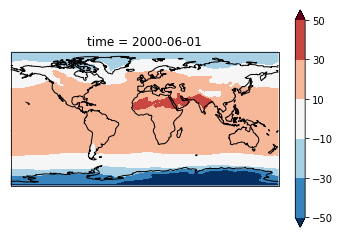

In [23]:
temp = cesm.temp - 273.15

temp_cyclic = mpu.cyclic_dataarray(temp)

ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()

levels = np.arange(-50, 51, 20)
temp_cyclic.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels=levels, extend='both')

ax.set_global()

### Exercise

 * plot the cmip5 precipitation data with xarray (`pr.hist`)

In [24]:
# code here

### Solution

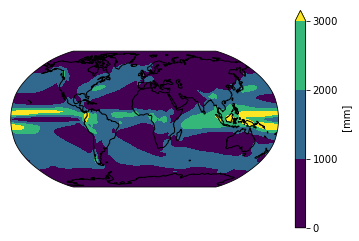

In [25]:
ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

pr_hist_cyclic = mpu.cyclic_dataarray(pr.hist)

levels = np.arange(0, 3001, 1000)
pr_hist_cyclic.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels=levels)

ax.set_global()